In [7]:
%load_ext autoreload
%autoreload 2

from test_repo_biometric import *
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
# get the file names
train_files, test_files = train_test_all_ids('/data/home/shruti/voxceleb/vgg/leaders/')


# results

In [30]:
# we would like to create and image
# the seperate image should be created for each identity and all those should be averaged
# real and fake seperate result images. 
# maybe create six images, one for each 3 datasets and real/fake

def get_cur_df(in_df1, in_df2, in_ids, r_of_f):
    
    cur_df1 = in_df1[(in_df1['actualLabel'].isin(in_ids)) & (in_df1['RealFake']==r_of_f)]
    cur_df2 = in_df2[(in_df2['actualLabel'].isin(in_ids)) & (in_df2['RealFake']==r_of_f)]
    n = np.min([len(cur_df1), len(cur_df2)])
    cur_df1 = cur_df1.iloc[:n, :].copy()
    cur_df2 = cur_df2.iloc[:n, :].copy()
    return cur_df1, cur_df2

def get_confusion_df(cur_df1, cur_df2, all_lbls):
    
    out_result = np.zeros((len(all_lbls), len(all_lbls)))
    
    l1 = np.array(cur_df1['predLabel'])
    l2 = np.array(cur_df2['predLabel'])
    for i in range(len(l1)):
        
        out_result[np.argwhere(all_lbls == l1[i]).ravel()[0], 
                   np.argwhere(all_lbls == l2[i]).ravel()[0]] = out_result[np.argwhere(all_lbls == l1[i]).ravel()[0], 
                                                                           np.argwhere(all_lbls == l2[i]).ravel()[0]] + 1
    return out_result*100/np.sum(out_result)

def get_image(in_df1, in_df2, in_ids, r_or_f, all_lbls):
    
    out_result = np.zeros((len(all_lbls), len(all_lbls)))
    
    for i in range(len(in_ids)):
        
        cur_df1, cur_df2 = get_cur_df(in_df1, in_df2, [in_ids[i]], r_or_f)
        if len(cur_df1)>0 and len(cur_df2)>0:
            out_result = out_result + get_confusion_df(cur_df1, cur_df2, all_lbls)
    return out_result
    
def display_image(img, ax, ttl):
    
    add_colorbar(ax.imshow(img, vmin=0, vmax=100))
    ax.set_title(ttl)
    ax.set_xticks([]); ax.set_yticks([])
    

In [31]:

fab_df = pd.read_csv('results100_fabnet.csv')# fabnet_df
vgg_df = pd.read_csv('results100_vgg.csv')# vgg_df



In [34]:

# create a map between labels and a number, fix this map to the train repo used.
all_lbls = list(train_files.keys())
all_lbls.sort()
all_lbls = np.array(all_lbls)

im_real = get_image(vgg_df, fab_df, list(test_files['real'].keys()), 'real', all_lbls)
im_fake = get_image(vgg_df, fab_df, list(test_files['fake'].keys()), 'fake', all_lbls)


### full images

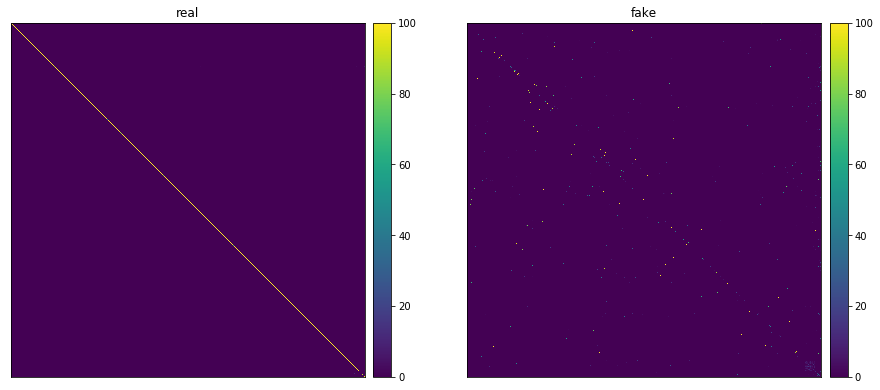

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
# display the images
display_image(im_real, ax[0], 'real')
display_image(im_fake, ax[1], 'fake')
plt.show()

### google

In [45]:
def display_image_lbls(img, ax, ttl, inlbl):
    
    add_colorbar(ax.imshow(img, vmin=0, vmax=100))
    ax.set_title(ttl)
    ax.set_xticks(range(len(inlbl))); ax.set_yticks(range(len(inlbl)))
    ax.set_xticklabels(inlbl, rotation=90); ax.set_yticklabels(inlbl)
    ax.set_ylabel('VGG')
    ax.set_xlabel('fabnet')
    

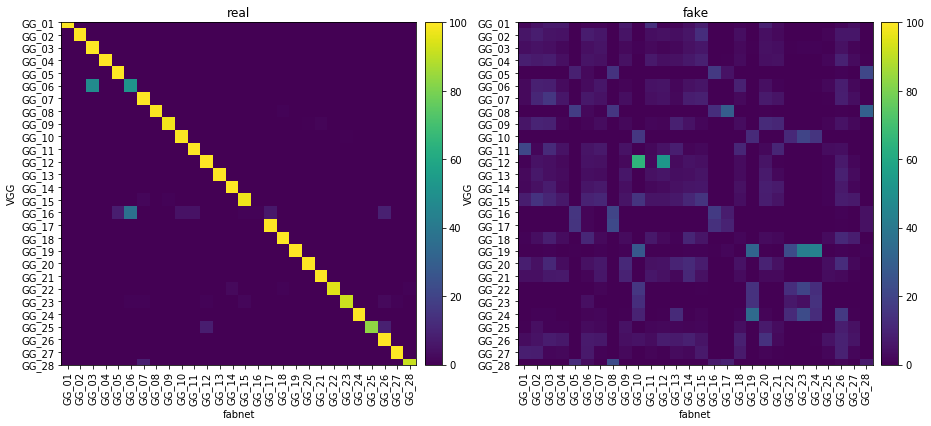

In [48]:
# create a map between labels and a number, fix this map to the train repo used.
cur_lbls = np.isin(all_lbls, ['GG_{0:02d}'.format(f+1) for f in range(28)])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
# display the images
display_image_lbls(im_real[cur_lbls, :][:, cur_lbls], ax[0], 'real', all_lbls[cur_lbls])
display_image_lbls(im_fake[cur_lbls, :][:, cur_lbls], ax[1], 'fake', all_lbls[cur_lbls])
plt.show()

### only leaders

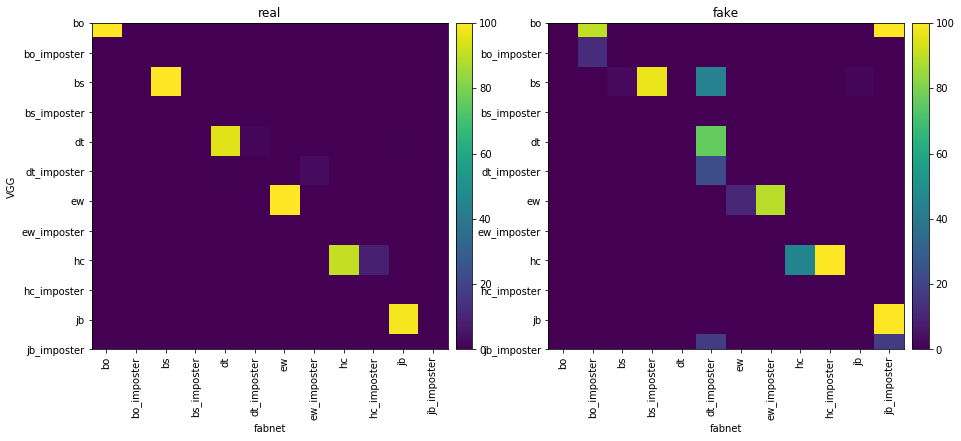

In [49]:
# create a map between labels and a number, fix this map to the train repo used.
cur_lbls = np.isin(all_lbls, ['bo','bs','dt','ew','hc','jb', 
                              'bo_imposter', 'bs_imposter', 
                              'ew_imposter', 'dt_imposter', 
                             'hc_imposter', 'jb_imposter'])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
# display the images
display_image_lbls(im_real[cur_lbls, :][:, cur_lbls], ax[0], 'real', all_lbls[cur_lbls])
display_image_lbls(im_fake[cur_lbls, :][:, cur_lbls], ax[1], 'fake', all_lbls[cur_lbls])
plt.show()

## no time 

In [50]:
fab_df_nt = pd.read_csv('results1_fabnet.csv')# fabnet_df
vgg_df_nt = pd.read_csv('results1_vgg.csv')# vgg_df

In [51]:
# create a map between labels and a number, fix this map to the train repo used.
all_lbls = list(train_files.keys())
all_lbls.sort()
all_lbls = np.array(all_lbls)

im_real = get_image(vgg_df_nt, fab_df_nt, list(test_files['real'].keys()), 'real', all_lbls)
im_fake = get_image(vgg_df_nt, fab_df_nt, list(test_files['fake'].keys()), 'fake', all_lbls)

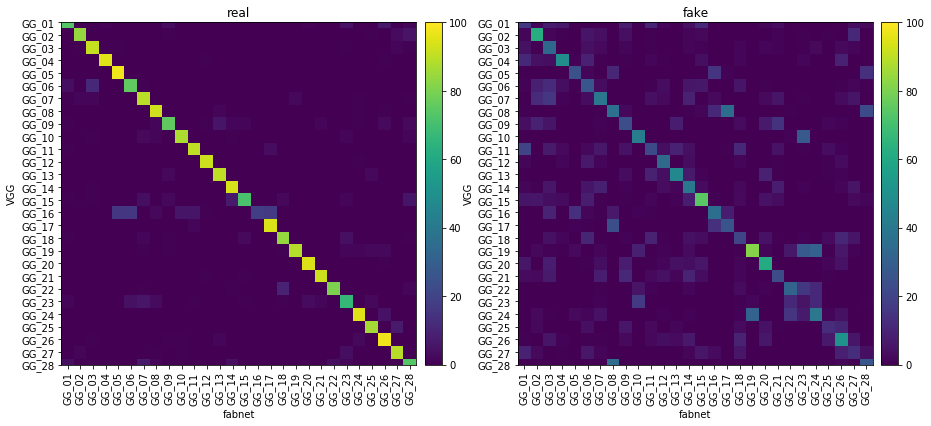

In [52]:
# create a map between labels and a number, fix this map to the train repo used.
cur_lbls = np.isin(all_lbls, ['GG_{0:02d}'.format(f+1) for f in range(28)])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
# display the images
display_image_lbls(im_real[cur_lbls, :][:, cur_lbls], ax[0], 'real', all_lbls[cur_lbls])
display_image_lbls(im_fake[cur_lbls, :][:, cur_lbls], ax[1], 'fake', all_lbls[cur_lbls])
plt.show()

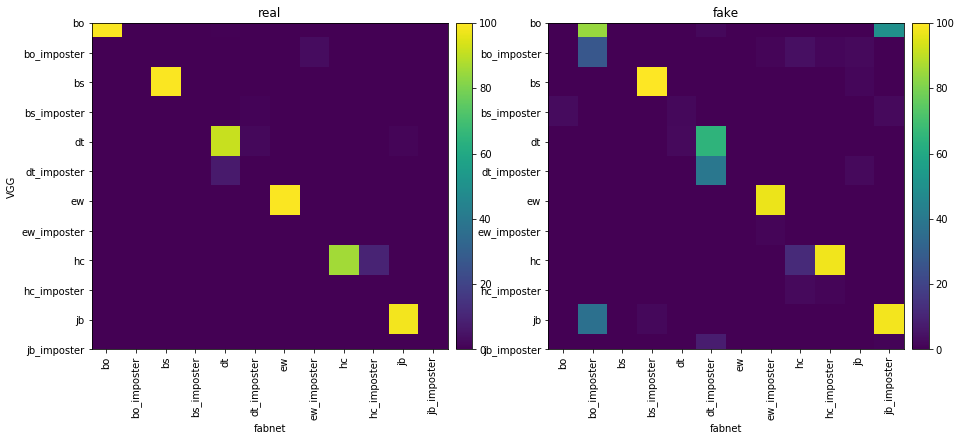

In [73]:
# create a map between labels and a number, fix this map to the train repo used.
cur_lbls = np.isin(all_lbls, ['bo','bs','dt','ew','hc','jb', 
                              'bo_imposter', 'bs_imposter', 
                              'ew_imposter', 'dt_imposter', 
                             'hc_imposter', 'jb_imposter'])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
# display the images
display_image_lbls(im_real[cur_lbls, :][:, cur_lbls], ax[0], 'real', all_lbls[cur_lbls])
display_image_lbls(im_fake[cur_lbls, :][:, cur_lbls], ax[1], 'fake', all_lbls[cur_lbls])
plt.show()

# steve buschemi + Jennifer Lawrence

In [54]:
# repo with leaders + ff original + imposters + Google + steve+jenn
def get_train_repo5(params):
    
    out_repo = {}
    # leaders
    out_repo = build_repo(params['bsfldr'], 
                      {f: train_files[f] for f in ['bo','br','bs','cb','dt','ew','hc','jb','kh', 'pb',
                                                  'bo_imposter','bs_imposter','ew_imposter','dt_imposter',
                                                   'hc_imposter', 'jb_imposter']}, 
                      {'frames': params['frames'], 'step': params['steps'], 
                       'pool_func': np.mean, 'N': 5000, 'n1':0, 'n2':1}, 
                      in_dict=out_repo)
    # ff original
    out_repo = build_repo(params['bsfldr'], 
                  {'FF_{0:03d}'.format(f): train_files['FF_{0:03d}'.format(f)] for f in range(1000)}, 
                  {'frames': params['frames'], 'step': params['steps'], 
                   'pool_func': np.mean, 'N': 5000, 'n1':0, 'n2':0.5}, 
                  in_dict=out_repo)

    # Google 
    out_repo = build_repo(params['bsfldr'], 
                  {'GG_{0:02d}'.format(f+1): train_files['GG_{0:02d}'.format(f+1)] for f in range(28)}, 
                  {'frames': params['frames'], 'step': params['steps'], 
                   'pool_func': np.mean, 'N': 5000, 'n1':0, 'n2':1}, 
                  in_dict=out_repo)
    
    # steve + jennifer
    out_repo = build_repo(params['bsfldr'], 
                  {'steve_b': train_files['steve_b']}, 
                  {'frames': params['frames'], 'step': params['steps'], 
                   'pool_func': np.mean, 'N': 5000, 'n1':0, 'n2':1}, 
                  in_dict=out_repo)
    out_repo = build_repo(params['bsfldr'], 
                  {'jen_l': train_files['jen_l']}, 
                  {'frames': params['frames'], 'step': params['steps'], 
                   'pool_func': np.mean, 'N': 5000, 'n1':0, 'n2':1}, 
                  in_dict=out_repo)

    return out_repo

In [58]:

# test the steve bushemi faceswap
def get_result_df(in_train_repo, params, in_test_dict, r_or_f):

    test_keys = np.sort(list(in_test_dict.keys()))
    r_or_f_res = {}
    for ids in test_keys:
        cur_test = {}
        cur_test = build_repo(params['bsfldr'], 
                              {ids: in_test_dict[ids]}, 
                              {'frames': params['frames'], 'step': params['steps'], 
                               'pool_func': np.mean, 'N': 5000, 'n1':0, 'n2':1}, 
                              in_dict=cur_test)

        cur_max, cur_pred_id = get_repo_dist(in_train_repo, cur_test[ids])
        r_or_f_res[ids] = pd.DataFrame(data=cur_max, columns=['dist'])
        r_or_f_res[ids]['predLabel'] = cur_pred_id
        r_or_f_res[ids]['actualLabel'] = ids
        r_or_f_res[ids]['RealFake'] = r_or_f

    return pd.concat([r_or_f_res[f] for f in test_keys], ignore_index=True, sort=False)



In [56]:
# repo with leaders
vgg_repo = get_train_repo5({'istrain':True, 'bsfldr':'/data/home/shruti/voxceleb/vgg/leaders/', 
                            'frames':100, 'steps':5})
vgg_result_df = get_result_df(vgg_repo, {'bsfldr':'/data/home/shruti/voxceleb/vgg/leaders/', 
                                      'frames':100, 'steps':5},
                           {'steve_b': test_files['fake']['steve_b']}, 'fake')

TypeError: 'function' object is not subscriptable

In [71]:
vgg_result_df['predLabel'].value_counts()

steve_b    254
FF_523     136
jb          13
FF_807       6
FF_003       5
GG_14        5
GG_15        2
FF_268       2
Name: predLabel, dtype: int64

In [60]:
# repo with leaders
fab_repo = get_train_repo5({'istrain':True, 'bsfldr':'/data/home/shruti/voxceleb/fabnet_metric/', 
                            'frames':1, 'steps':1})

fab_result_df = get_result_df(fab_repo, {'bsfldr':'/data/home/shruti/voxceleb/fabnet_metric/', 
                                      'frames':1, 'steps':1},
                           {'steve_b': test_files['fake']['steve_b']}, 'fake')
fab_result_df['predLabel'].value_counts()

In [72]:
fab_result_df['predLabel'].value_counts()

FF_845         62
jen_l          51
steve_b        38
FF_056         35
FF_364         34
hc_imposter    22
FF_780         21
GG_07          21
GG_18          21
FF_921         19
FF_915         18
jb_imposter    15
FF_322         14
FF_254         12
hc             10
FF_658          4
pb              4
FF_504          4
GG_14           3
ew_imposter     3
FF_464          3
FF_601          2
FF_295          2
jb              2
FF_013          1
FF_239          1
FF_556          1
Name: predLabel, dtype: int64

#### no time

In [68]:
# repo with leaders
vgg_repo = get_train_repo5({'istrain':True, 'bsfldr':'/data/home/shruti/voxceleb/vgg/leaders/', 
                            'frames':1, 'steps':1})
vgg_result_df_nt = get_result_df(vgg_repo, {'bsfldr':'/data/home/shruti/voxceleb/vgg/leaders/', 
                                      'frames':1, 'steps':1},
                           {'steve_b': test_files['fake']['steve_b']}, 'fake')
vgg_result_df_nt['predLabel'].value_counts()

steve_b        697
FF_523         455
FF_807         199
FF_003          81
bs              64
              ... 
GG_27            1
FF_571           1
FF_492           1
GG_11            1
jb_imposter      1
Name: predLabel, Length: 64, dtype: int64

In [69]:
# repo with leaders
fab_repo = get_train_repo5({'istrain':True, 'bsfldr':'/data/home/shruti/voxceleb/fabnet/leaders', 
                            'frames':1, 'steps':1})

fab_result_df_nt = get_result_df(fab_repo, {'bsfldr':'/data/home/shruti/voxceleb/fabnet/leaders', 
                                      'frames':1, 'steps':1},
                           {'steve_b': test_files['fake']['steve_b']}, 'fake')
fab_result_df_nt['predLabel'].value_counts()

jen_l          1198
hc_imposter     186
FF_845          156
ew_imposter     122
GG_28            79
FF_780           77
steve_b          67
jb_imposter      59
FF_311           54
FF_239           38
FF_225           34
FF_811           30
GG_18            24
hc               22
FF_150            9
FF_914            8
FF_095            6
FF_254            6
GG_15             5
FF_723            5
FF_084            4
bo                4
FF_302            4
FF_579            3
FF_178            3
FF_348            2
FF_015            1
FF_639            1
FF_089            1
FF_265            1
FF_556            1
FF_364            1
jb                1
Name: predLabel, dtype: int64